In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()
inspector = inspect(engine)
#inspector.get_table_names()

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 


In [10]:
# get the last 12 months of data 
last_year = dt.date(2017, 9, 30) - dt.timedelta(days=365)
print(last_year)
cur_year = dt.date(2017, 9, 30)
print(cur_year)

2016-09-30
2017-09-30


# Exploratory Climate Analysis

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 3600x3600 with 0 Axes>

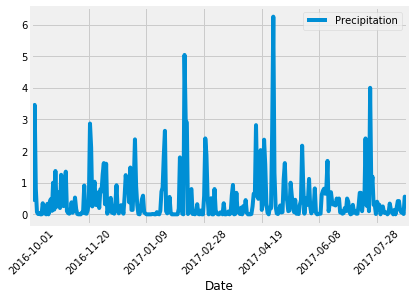

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
columns = inspector.get_columns('Measurement')
#for c in columns:
    #print(c['name'], c["type"])

#results = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date > '2010-01-01',Measurement.date < '2010-01-31')
results = session.query(func.max(Measurement.prcp),Measurement.date).\
          filter(Measurement.date > last_year, Measurement.date < cur_year ).\
          group_by(Measurement.date)
          
#measure_id = [result[0] for result in results]
#measure_dt = [result[1] for result in results]

final_result = [list(i) for i in results] 
#measure_id
#measure_dt
#final_result
df = pd.DataFrame(final_result)
df.columns = ['Precipitation','Date']



df.set_index(df['Date'],inplace=True) 
df1=df['Precipitation']
df1.columns=['Precipitation']
#df1
plt.figure(figsize=(50,50))
ax = df.plot(x_compat=True)
#ax.xaxis.set_major_locator(mdates.MonthLocator())
# Format the x axis
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO,interval=2))
#ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax = df1.plot
plt.xticks(rotation=45)
#plt.tight_layout()
#dict
#session.query(Measurement.id, Measurement.prcp).limit(10).all()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results = session.query(func.max(Measurement.prcp),Measurement.date).\
group_by(Measurement.date)
#filter(Measurement.date > last_year, Measurement.date < cur_year ).\
          
          
#measure_id = [result[0] for result in results]
#measure_dt = [result[1] for result in results]

final_result = [list(i) for i in results] 
#measure_id
#measure_dt
#final_result
df = pd.DataFrame(final_result)
df.columns = ['Precipitation','Date']
df.describe()

,Precipitation
count,2792.000000
mean,0.510799
std,0.842046
min,0.000000
25%,0.040000
50%,0.220000
75%,0.620000
max,11.530000


![describe](Images/describe.png)

In [11]:
# Design a query to show how many stations are available in this dataset?
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

#results = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date > '2010-01-01',Measurement.date < '2010-01-31')
results = session.query(func.count(Station.station))
#measure_id = [result[0] for result in results]
#measure_dt = [result[1] for result in results]
final_result = [list(i) for i in results] 
final_result

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[[9]]

In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

results = session.query(Station.station,func.count(Station.id)).\
    join(Measurement, Measurement.station == Station.station).\
    group_by(Station.station).order_by(func.count(Station.station).desc())    


#results = session.query(Station.station,func.count(Station.id)).group_by(Station.station).order_by(func.count(Station.id).desc())
#results = session.query(Station.station)
#measure_id = [result[0] for result in results]
#measure_dt = [result[1] for result in results]
final_result = [list(i) for i in results] 
final_result

[['USC00519281', 2772],
 ['USC00519397', 2724],
 ['USC00513117', 2709],
 ['USC00519523', 2669],
 ['USC00516128', 2612],
 ['USC00514830', 2202],
 ['USC00511918', 1979],
 ['USC00517948', 1372],
 ['USC00518838', 511]]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

results = session.query( func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
join(Station, Measurement.station == Station.station).\
filter(Station.station=='USC00519281')
final_result = [list(i) for i in results] 
final_result

#[(54.0, 85.0, 71.66378066378067)]

[[54.0, 85.0, 71.66378066378067]]

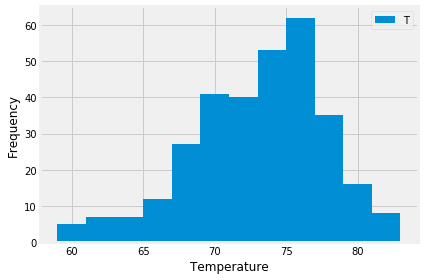

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
final_result = [list(i) for i in temperature] 
len(final_result)
    
temp_df=pd.DataFrame(final_result)
temp_df.columns=  ['Station','Date','tobs']
temp_df['tobs']
temp_df.head()
ax=plt.hist(temp_df['tobs'],12)
plt.legend('Tobs')
#plt.legend('Tobs',prop={'size': 5})
#ax = temp_df.plot(x_compat=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout() 
plt.show()

![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))
#[(62.0, 69.57142857142857, 74.0)]

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 5, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)
#62.0 68.36585365853658 74.0

[(58.0, 74.13868613138686, 83.0)]


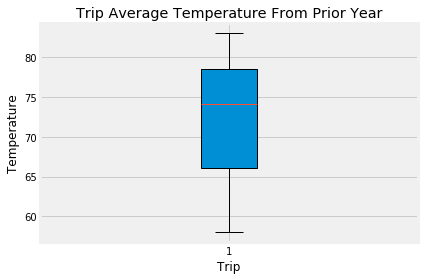

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


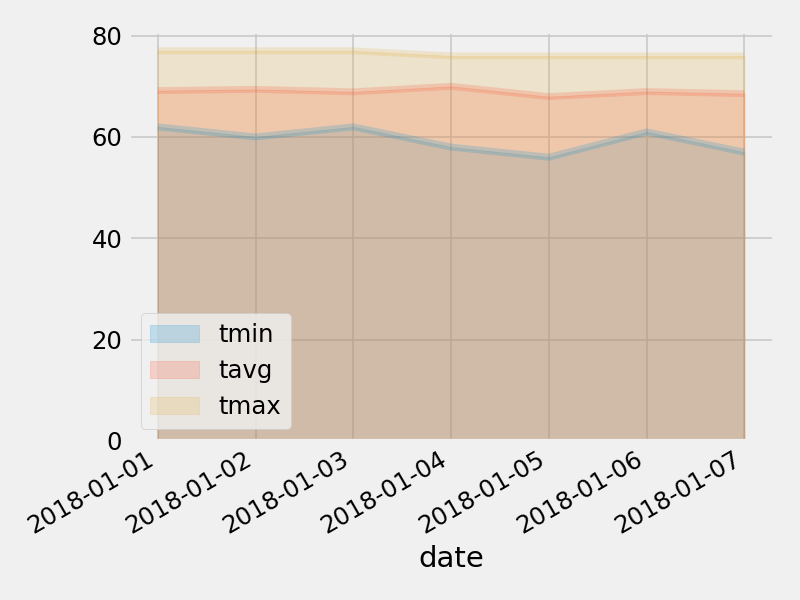

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
